# PROYECTO PARA FAIRPLAY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib qt

## LEYENDO BASE "WINE QUALITY"

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url, sep =';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bueno
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,5,0
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,6,0
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00,6,0
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,5,0


In [3]:
wine.isna().sum() #Checando missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## EXPLORANDO VARIABLES

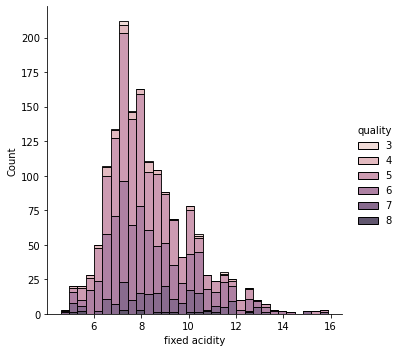

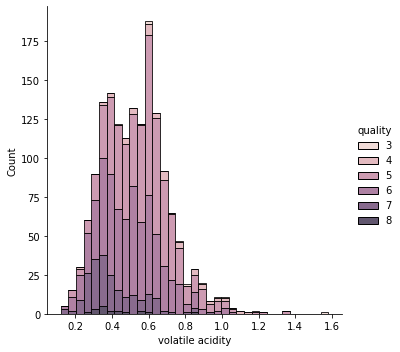

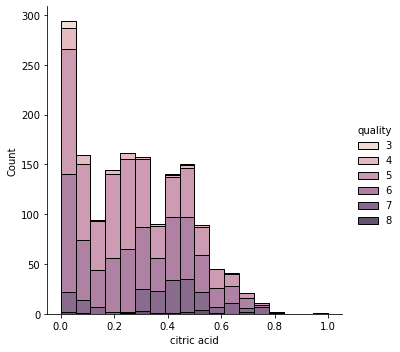

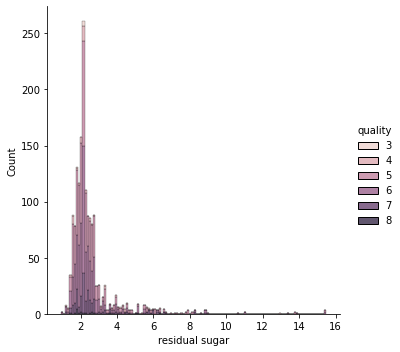

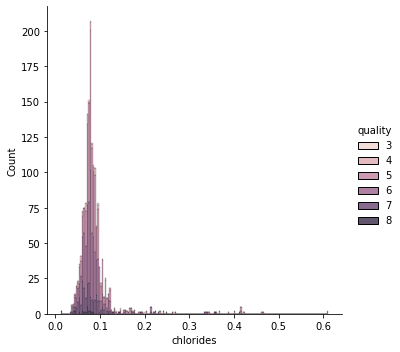

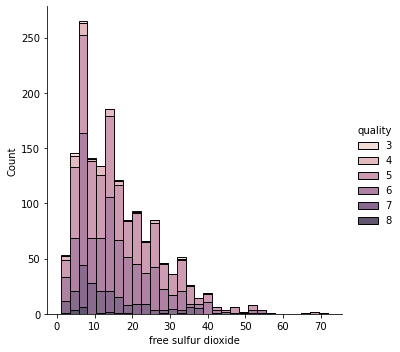

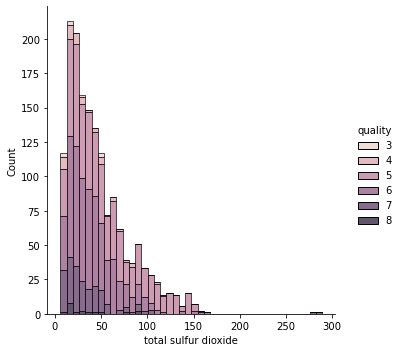

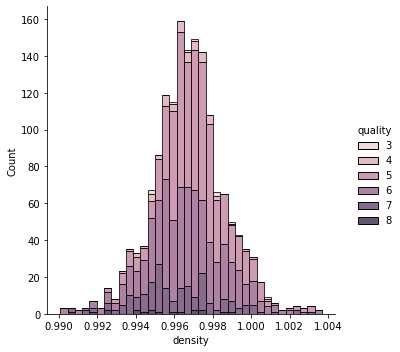

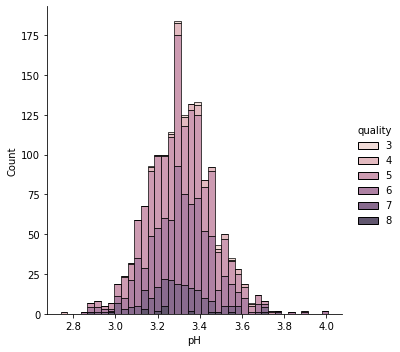

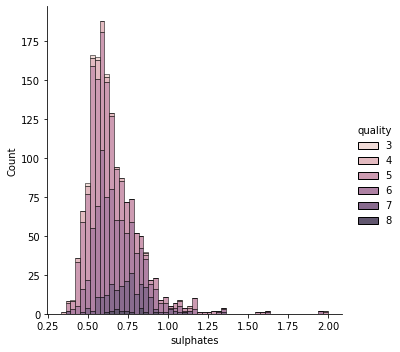

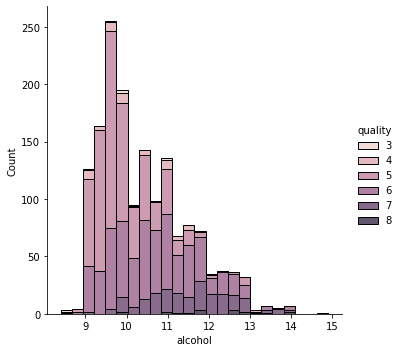

In [4]:
variables = wine.drop('quality', axis = 1).columns
for x in variables:
    sns.displot(data = wine, x = x, hue = 'quality', multiple = 'stack');

**SE PUEDE OBSERVAR QUE HAY SUFICIENTES CASOS PARA APROXIMARSE COMO UN PROBLEMA DE ML. SE TOMARÁ UNA CALIDAD IGUAL O MAYOR A 6 COMO UNA BUENA CALIDAD. LOS CASOS ATÍPICOS SON MÍNIMOS**

<AxesSubplot:>

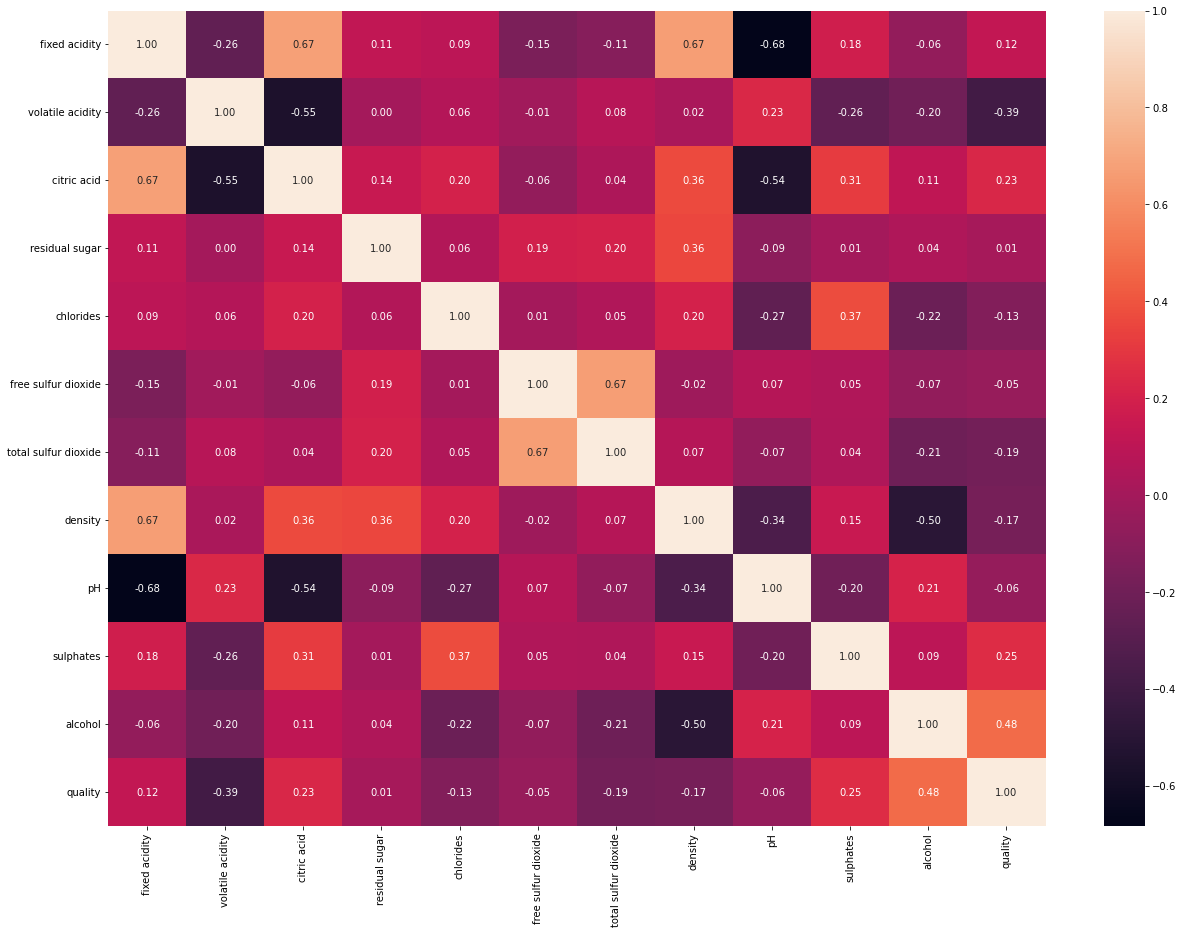

In [5]:
plt.figure(figsize = (21,15))
sns.heatmap(wine.corr(),
            annot = True,
            fmt = '.2f')

## PREPARANDO LOS SUBCONJUNTOS DE DATOS PARA ML

In [6]:
# Separando "buenos" y "malos"
wine['bueno'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine_feat = wine.drop(['quality','bueno'], axis = 1)
wine_tar = wine['bueno']

In [7]:
# Proporción de buenos
wine['bueno'].value_counts()

0    1382
1     217
Name: bueno, dtype: int64

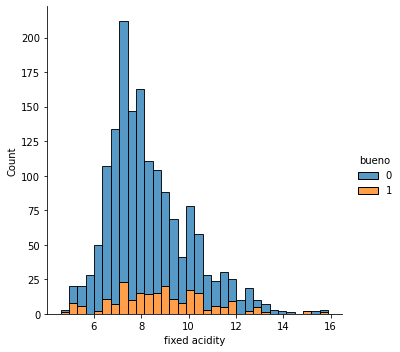

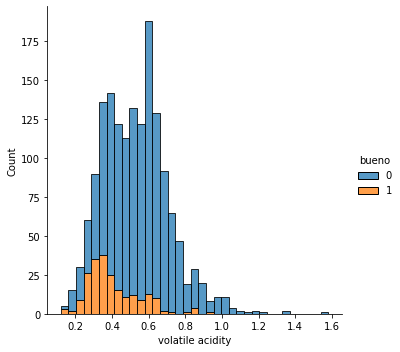

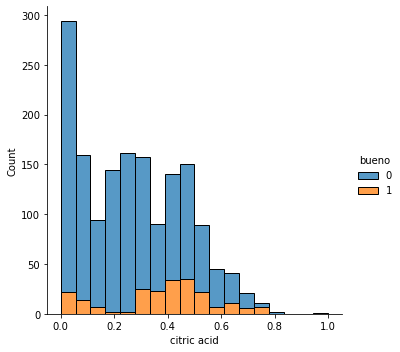

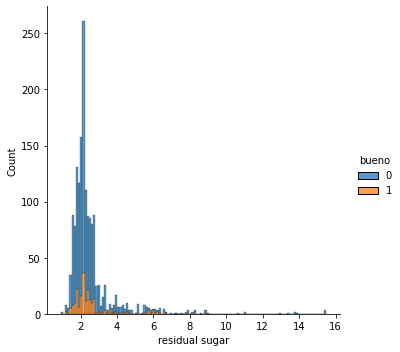

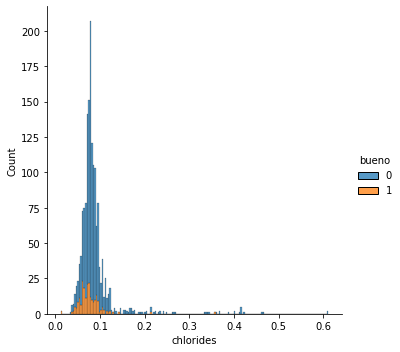

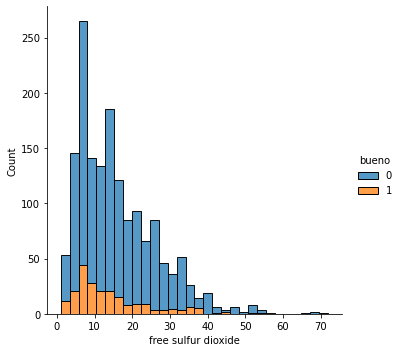

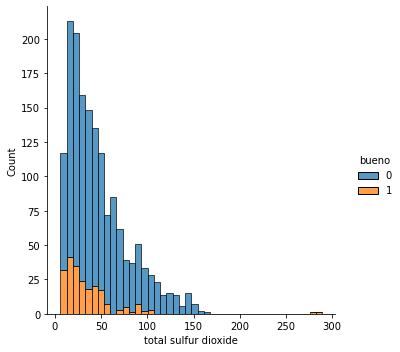

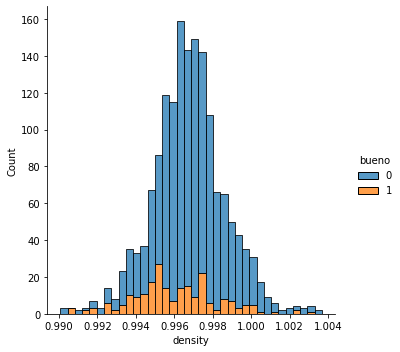

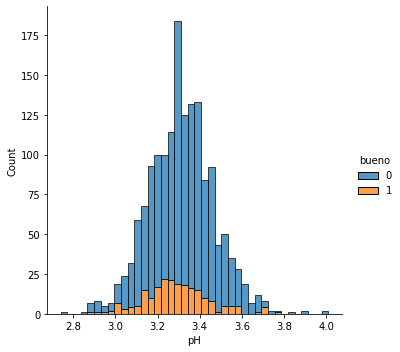

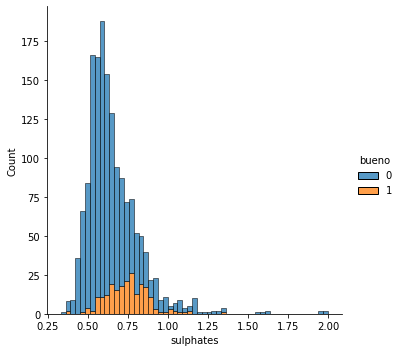

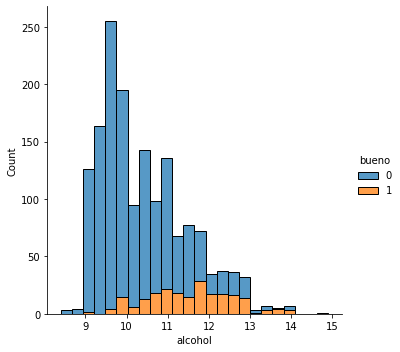

In [8]:
variables = wine.drop(['quality', 'bueno'], axis = 1).columns
for x in variables:
    sns.displot(data = wine.drop('quality', axis = 1), x = x, hue = 'bueno', multiple = 'stack'); #Con Target dicotómico

In [9]:
# Estandarizando variables para evitar influencia de escala
from sklearn.preprocessing import StandardScaler
wine_features = wine_feat
wine_feat = StandardScaler().fit_transform(wine_feat)

In [10]:
# Separando en entrenamiento y prueba
from sklearn.model_selection import train_test_split
feat_train, feat_test, tar_train, tar_test = train_test_split(wine_feat, wine_tar, test_size=.25)

## MODELO 1: ÁRBOL DE DECISIÓN

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
modelo_1 = DecisionTreeClassifier(random_state = 0, max_leaf_nodes = 5)
m_1 = modelo_1.fit(feat_train, tar_train)
tar_pred_m1 = modelo_1.predict(feat_test)
print(classification_report(tar_test, tar_pred_m1)) #print para que salga bonito

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       350
           1       0.48      0.42      0.45        50

    accuracy                           0.87       400
   macro avg       0.70      0.68      0.69       400
weighted avg       0.86      0.87      0.87       400



[Text(186.0, 190.26, 'X[10] <= 1.058\ngini = 0.24\nsamples = 1199\nvalue = [1032, 167]'),
 Text(111.60000000000001, 135.9, 'X[1] <= -0.854\ngini = 0.144\nsamples = 1012\nvalue = [933, 79]'),
 Text(74.4, 81.53999999999999, 'X[10] <= 0.025\ngini = 0.387\nsamples = 183\nvalue = [135, 48]'),
 Text(37.2, 27.180000000000007, 'gini = 0.187\nsamples = 96\nvalue = [86, 10]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.492\nsamples = 87\nvalue = [49, 38]'),
 Text(148.8, 81.53999999999999, 'gini = 0.072\nsamples = 829\nvalue = [798, 31]'),
 Text(260.40000000000003, 135.9, 'X[9] <= -0.255\ngini = 0.498\nsamples = 187\nvalue = [99, 88]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.34\nsamples = 69\nvalue = [54, 15]'),
 Text(297.6, 81.53999999999999, 'gini = 0.472\nsamples = 118\nvalue = [45, 73]')]

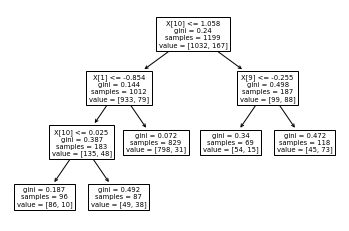

In [12]:
from sklearn import tree
tree.plot_tree(m_1)

In [13]:
wine_features.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
from sklearn.inspection import permutation_importance
result_1 = permutation_importance(m_1, feat_train, tar_train)

In [15]:
tree_import = pd.Series(result_1.importances_mean, index = wine_features.columns)

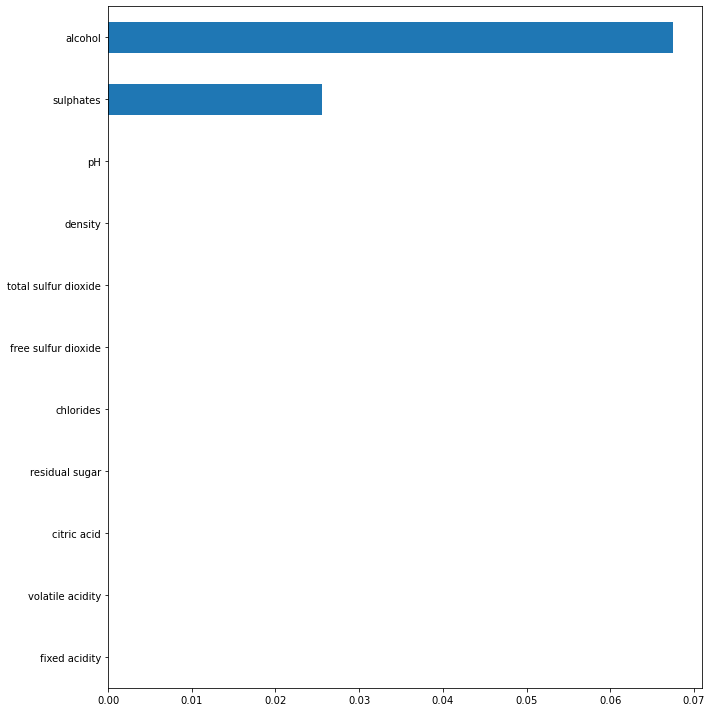

In [16]:
fig, ax = plt.subplots()
tree_import.nsmallest(11).plot(kind = 'barh', ax = ax, figsize = (10,10))
fig.tight_layout()
plt.show()

## MODELO 2: RANDOM FOREST

In [17]:
from sklearn.ensemble import RandomForestClassifier
modelo_2 = RandomForestClassifier(random_state=1)
m_2 = modelo_2.fit(feat_train, tar_train)
tar_pred_m2 = modelo_2.predict(feat_test)
print(classification_report(tar_test, tar_pred_m2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       350
           1       0.73      0.48      0.58        50

    accuracy                           0.91       400
   macro avg       0.83      0.73      0.76       400
weighted avg       0.90      0.91      0.90       400



<AxesSubplot:>

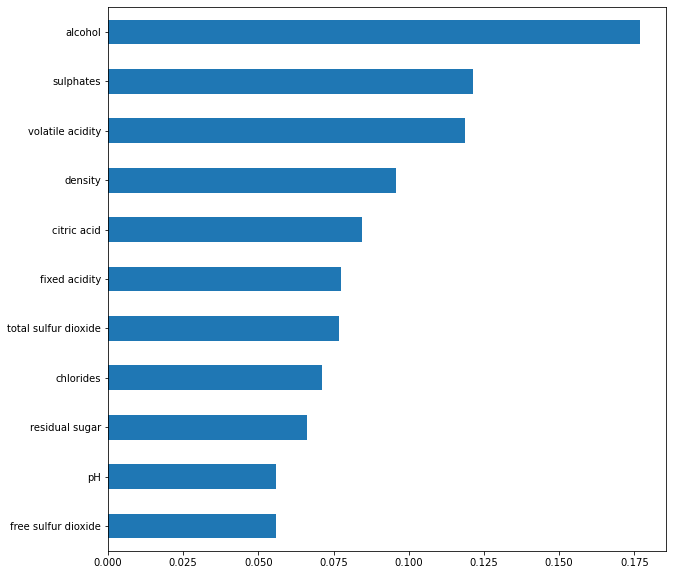

In [18]:
feat_imp = pd.Series(modelo_2.feature_importances_, index = wine_features.columns)
feat_imp.nsmallest(11).plot(kind = 'barh', figsize = (10,10))

## MODELO 3: XGBOOST

In [19]:
import xgboost as xgb
modelo_3 = xgb.XGBClassifier(random_state = 0, use_label_encoder = False)
mod_3 = modelo_3.fit(feat_train, tar_train)
tar_pred_m3 = modelo_3.predict(feat_test)
print(classification_report(tar_test, tar_pred_m3))

[16:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       350
           1       0.60      0.54      0.57        50

    accuracy                           0.90       400
   macro avg       0.77      0.74      0.76       400
weighted avg       0.89      0.90      0.90       400



<AxesSubplot:>

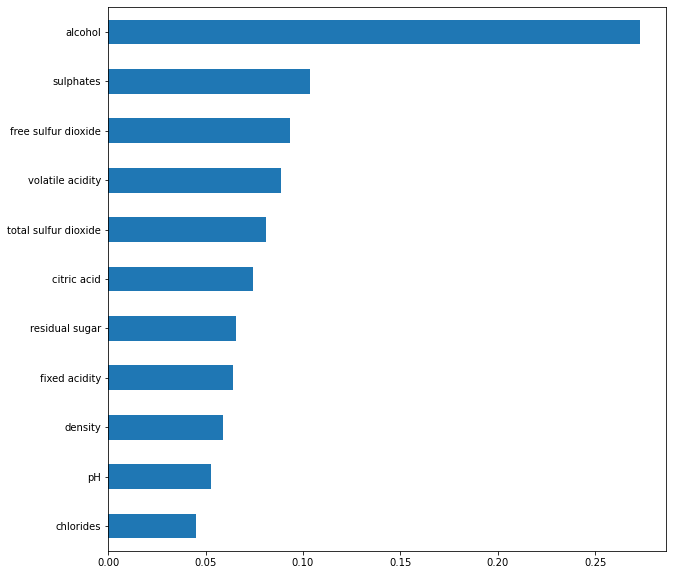

In [20]:
feat_imp = pd.Series(modelo_3.feature_importances_, index = wine_features.columns)
feat_imp.nsmallest(11).plot(kind = 'barh', figsize = (10,10))

## BUENOS Y MALOS VINOS

In [21]:
pd.options.display.float_format = '{:.2f}'.format

In [22]:
# LOS BUENOS VINOS
wine_buen = wine[wine['bueno'] == 1]
wine_buen[['alcohol', 'volatile acidity', 'sulphates']].describe()

,alcohol,volatile acidity,sulphates
count,217.00,217.00,217.00
mean,11.52,0.41,0.74
std,1.00,0.14,0.13
min,9.20,0.12,0.39
25%,10.80,0.30,0.65
50%,11.60,0.37,0.74
75%,12.20,0.49,0.82
max,14.00,0.92,1.36


In [23]:
# lOS MALOS VINOS
wine_malo = wine[wine['bueno'] == 0]
wine_malo[['alcohol', 'volatile acidity', 'sulphates']].describe()

,alcohol,volatile acidity,sulphates
count,1382.00,1382.00,1382.00
mean,10.25,0.55,0.64
std,0.97,0.18,0.17
min,8.40,0.16,0.33
25%,9.50,0.42,0.54
50%,10.00,0.54,0.60
75%,10.90,0.65,0.70
max,14.90,1.58,2.00


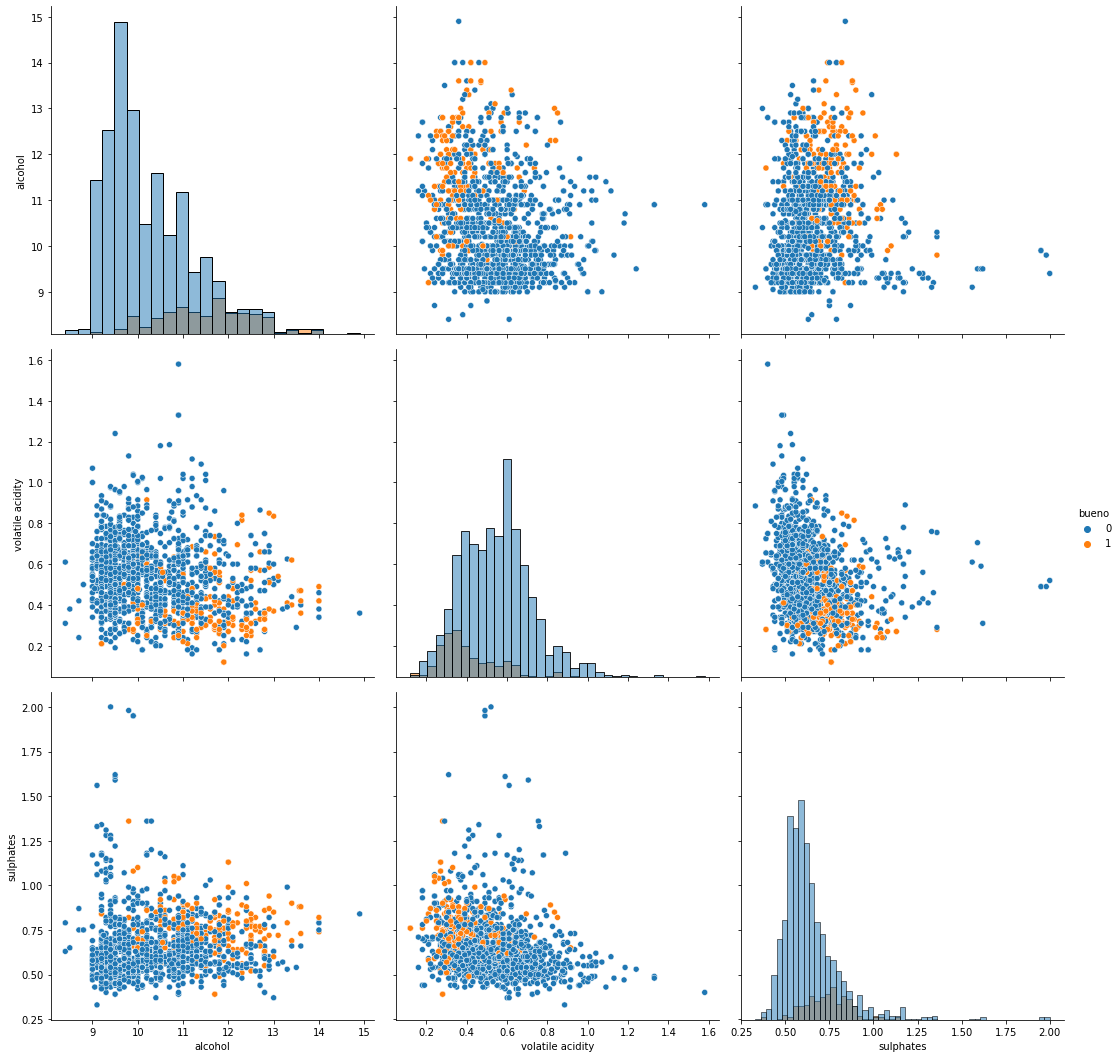

In [24]:
red_wine = wine[['alcohol', 'volatile acidity', 'sulphates', 'bueno']]
g = sns.PairGrid(red_wine, hue = 'bueno', height = 5, aspect = 1)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()